In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import scipy.io as sio
from os.path import dirname, join as pjoin
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
emotions = ['Angry', 'Disgust','Fear','Happy','Sad','Surprise']

In [ ]:
# DIR=r"/content/drive/MyDrive/Colab(AI)/Imagined Emotions"
DIR=r"/content/drive/MyDrive/Colab(AI)/Imagined Emotions"

In [ ]:
labels=[]
features=[]

In [ ]:
for signal in emotions:
  path= os.path.join(DIR, signal)
  label=emotions.index(signal)
  for i in os.listdir(path):
    sig_path= os.path.join(path, i)
    sig_array=sio.loadmat(sig_path)
    if sig_array is None:
      continue
    features.append(sig_array['s  '].transpose())
    labels.append(label)

In [ ]:
import pandas as pd
df = pd.DataFrame({"EEG":features,"Labels":labels})
df

,EEG,Labels
0,"[[0.5128205002818504, 1.5384615008437321, 7.38...",0
1,"[[-1.5384615008480977, 1.0256410005644283, 14....",0
2,"[[11.282051006161783, -1.5384615008457332, 2.2...",0
3,"[[4.1025640022435255, 4.7179486025779624, -12....",0
4,"[[5.641025503084165, 5.230769102858176, 8.6153...",0
...,...,...
35369,"[[24.61538401346388, 141.2307657772266, 31.487...",5
35370,"[[6.769230603707911, -385.743580310928, 7.4871...",5
35371,"[[-14.769230408071962, -416.5128103277581, -10...",5
35372,"[[3.692307602017536, -351.89742729241846, 7.99...",5


In [ ]:
features=np.array(features)
features.shape


(35374, 128, 14)

In [ ]:
labels=np.array(labels)
labels.shape


(35374,)

In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size =0.25, random_state=42)

In [ ]:
print('size of feature_train:', features_train.shape)
print('size of feature_test:', features_test.shape)
print('size of label_train:', labels_train.shape)
print('size of label_test:', labels_test.shape)

size of feature_train: (26530, 128, 14)
size of feature_test: (8844, 128, 14)
size of label_train: (26530,)
size of label_test: (8844,)


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import backend as K
from keras.layers import Conv1D, Dropout, Flatten, BatchNormalization

In [ ]:
def create_model():
    input_layer = keras.Input(shape=(128,14))

    x = layers.Conv1D(filters=1024, kernel_size=3, strides=2, activation="relu", padding="same")(input_layer)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=512, kernel_size=3, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=256, kernel_size=5, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=128, kernel_size=5, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=64, kernel_size=7, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=32, kernel_size=7, strides=2, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dropout(0.2)(x)

    x = layers.Flatten()(x)

    x = layers.Dense(4096, activation="relu")(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(2048, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
    output_layer = layers.Dense(6, activation="softmax")(x)


    return keras.Model(inputs=input_layer, outputs=output_layer)


In [ ]:
conv_model = create_model()
print(conv_model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 14)]         0         
                                                                 
 conv1d (Conv1D)             (None, 64, 1024)          44032     
                                                                 
 batch_normalization (Batch  (None, 64, 1024)          4096      
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 512)           1573376   
                                                                 
 batch_normalization_1 (Bat  (None, 32, 512)           2048      
 chNormalization)                                                
                                                                 
 conv1d_2 (Conv1D)           (None, 16, 256)           655616

In [ ]:
from numpy.ma.core import outer
conv_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = conv_model.fit(features_train, labels_train, batch_size=300,epochs=35,validation_data=(features_test,labels_test))

Epoch 1/35
89/89 [==============================] - 350s 4s/step - loss: 7.3001 - accuracy: 0.2305 - val_loss: 1.8421 - val_accuracy: 0.2186
Epoch 2/35
89/89 [==============================] - 347s 4s/step - loss: 1.7444 - accuracy: 0.2712 - val_loss: 1.7238 - val_accuracy: 0.2815
Epoch 3/35
89/89 [==============================] - 347s 4s/step - loss: 1.6977 - accuracy: 0.2926 - val_loss: 1.6655 - val_accuracy: 0.3042
Epoch 4/35
89/89 [==============================] - 347s 4s/step - loss: 1.6484 - accuracy: 0.3194 - val_loss: 1.6155 - val_accuracy: 0.3291
Epoch 5/35
89/89 [==============================] - 346s 4s/step - loss: 1.5979 - accuracy: 0.3464 - val_loss: 1.5826 - val_accuracy: 0.3539
Epoch 6/35
89/89 [==============================] - 346s 4s/step - loss: 1.5449 - accuracy: 0.3763 - val_loss: 1.5938 - val_accuracy: 0.3622
Epoch 7/35
89/89 [==============================] - 344s 4s/step - loss: 1.4940 - accuracy: 0.4028 - val_loss: 1.5239 - val_accuracy: 0.3959
Epoch 8/35
89

In [ ]:
 conv_model.evaluate(features_test,labels_test)

277/277 [==============================] - 21s 76ms/step - loss: 1.6596 - accuracy: 0.6065


[1.6596249341964722, 0.6065129041671753]

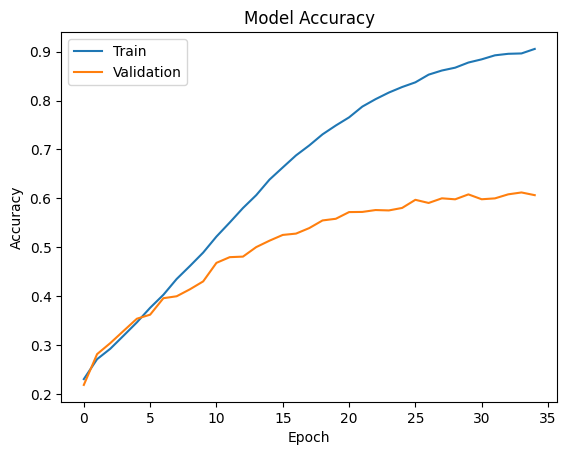

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

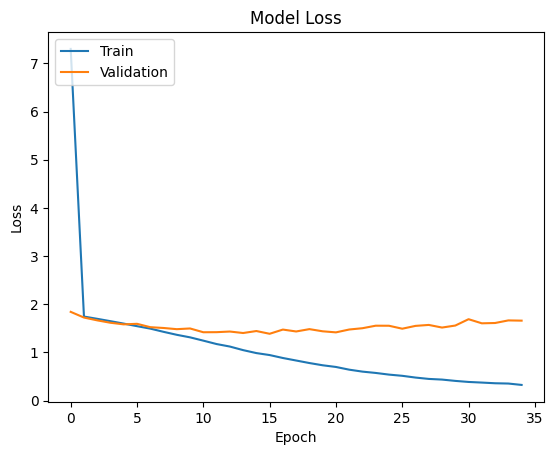

In [ ]:
#plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
predictions = conv_model.predict(features_test)
predicted_labels = np.argmax(predictions, axis=1)

277/277 [==============================] - 21s 74ms/step


In [ ]:
loss, accuracy = conv_model.evaluate(features_test, labels_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

277/277 [==============================] - 21s 76ms/step - loss: 1.6596 - accuracy: 0.6065
Test Loss: 1.6596249341964722
Test Accuracy: 0.6065129041671753
